In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import ipywidgets as widgets

In [2]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
pd.set_option('display.max_columns', None)

In [9]:
df = pd.read_csv('employee_performance.csv')

df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Employee_ID        1020 non-null   object 
 1   Age                1020 non-null   int64  
 2   Gender             1020 non-null   object 
 3   Department         1020 non-null   object 
 4   Experience_Years   988 non-null    float64
 5   Performance_Score  990 non-null    float64
 6   Salary             1020 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 55.9+ KB


(1020, 7)

In [10]:
df.head()

,Employee_ID,Age,Gender,Department,Experience_Years,Performance_Score,Salary
0,E0524,49,Female,Operations,5.6,67.8,33013.0
1,E0603,55,Female,Sales,5.5,NaN,42640.0
2,E0527,29,Female,Sales,10.7,68.8,72180.0
3,E0032,30,Female,Operations,9.8,NaN,65750.0
4,E0617,58,Male,Sales,11.5,72.8,74830.0


In [14]:
df.describe()

,Age,Experience_Years,Performance_Score,Salary
count,1020.000000,988.000000,990.000000,1020.000000
mean,40.898039,7.209919,69.755657,52905.790196
std,11.160063,3.070575,9.935075,33016.717394
min,22.000000,0.000000,37.600000,5000.000000
25%,31.000000,5.200000,63.025000,38867.750000
50%,42.000000,7.250000,70.050000,50595.500000
75%,50.000000,9.200000,76.675000,60984.250000
max,59.000000,16.800000,97.500000,400000.000000


In [15]:
df.columns.tolist()

['Employee_ID',
 'Age',
 'Gender',
 'Department',
 'Experience_Years',
 'Performance_Score',
 'Salary']

In [19]:
df.duplicated().sum()

np.int64(20)

In [20]:
df.isnull().sum()

Employee_ID           0
Age                   0
Gender                0
Department            0
Experience_Years     32
Performance_Score    30
Salary                0
dtype: int64

# Feature Engineering

In [28]:
numeric_cols = ['Age', 'Experience_Years', 'Performance_Score', 'Salary']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [44]:
# Handle missing rows
df['Experience_Years'] = df['Experience_Years'].fillna(df['Experience_Years'].median())
df['Performance_Score'] = df['Performance_Score'].fillna(df['Performance_Score'].median())

df['Experience_Years'] = df['Experience_Years'].astype(int)
df['Performance_Score'] = df['Performance_Score'].astype(int)

In [41]:
# Salary Outlier cap
salary_cap = df['Salary'].quantile(0.99)
df['Salary'] = np.where(df['Salary'] > salary_cap, salary_cap, df['Salary'])

df['Salary'] = df['Salary'].astype(int)

In [48]:
df = df.drop_duplicates().reset_index(drop=True)

In [52]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                1000 non-null   int64 
 1   Gender             1000 non-null   object
 2   Department         1000 non-null   object
 3   Experience_Years   1000 non-null   int64 
 4   Performance_Score  1000 non-null   int64 
 5   Salary             1000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 47.0+ KB


,Age,Gender,Department,Experience_Years,Performance_Score,Salary
0,49,Female,Operations,5,67,33013
1,55,Female,Sales,5,70,42640
2,29,Female,Sales,10,68,72180
3,30,Female,Operations,9,70,65750
4,58,Male,Sales,11,72,74830


In [58]:
# Engagement Index (blend performance + experience)
df['Engagement_Index'] = (df['Performance_Score'] * 0.7) + (df['Experience_Years'] * 0.3)
df['Engagement_Index'] = df['Engagement_Index'] / df['Engagement_Index'].max() * 10  # Normalize(1-10 scale)
df['Engagement_Index'] = df['Engagement_Index'].astype(int)

In [74]:
# Performance categories
def categorize_performance(score):
    if score >= 70:
        return 'High'
    elif 45 <= score <= 70:  # Explicit range for Medium
        return 'Medium'
    else:  # Covers < 45
        return 'Low'

df['Performance_Category'] = df['Performance_Score'].apply(categorize_performance)

In [76]:
df.head()

,Age,Gender,Department,Experience_Years,Performance_Score,Salary,Engagement_Index,Performance_Category
0,49,Female,Operations,5,67,33013,6,Medium
1,55,Female,Sales,5,70,42640,7,High
2,29,Female,Sales,10,68,72180,7,Medium
3,30,Female,Operations,9,70,65750,7,High
4,58,Male,Sales,11,72,74830,7,High


# Explotratory Data Analysis

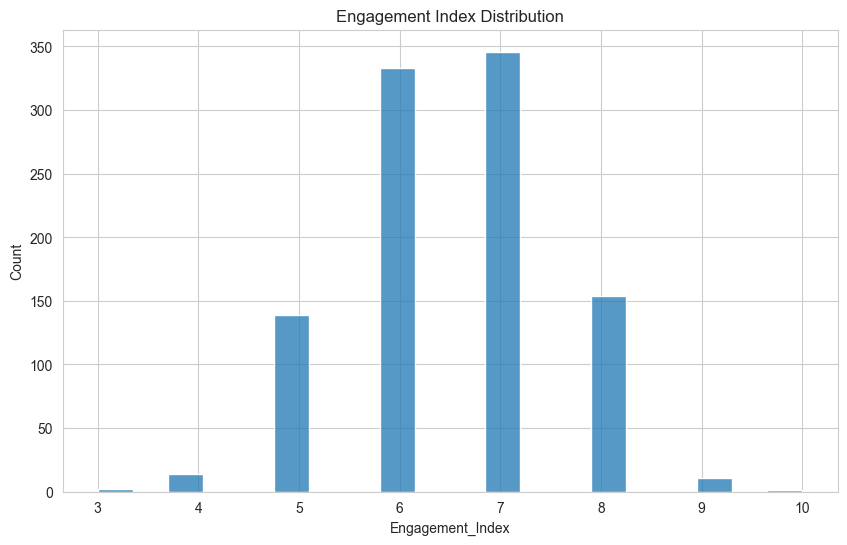

In [77]:
#Engagement Index Distribution
sns.histplot(df['Engagement_Index'], bins=20)
plt.title('Engagement Index Distribution')
plt.show()

# Univariate

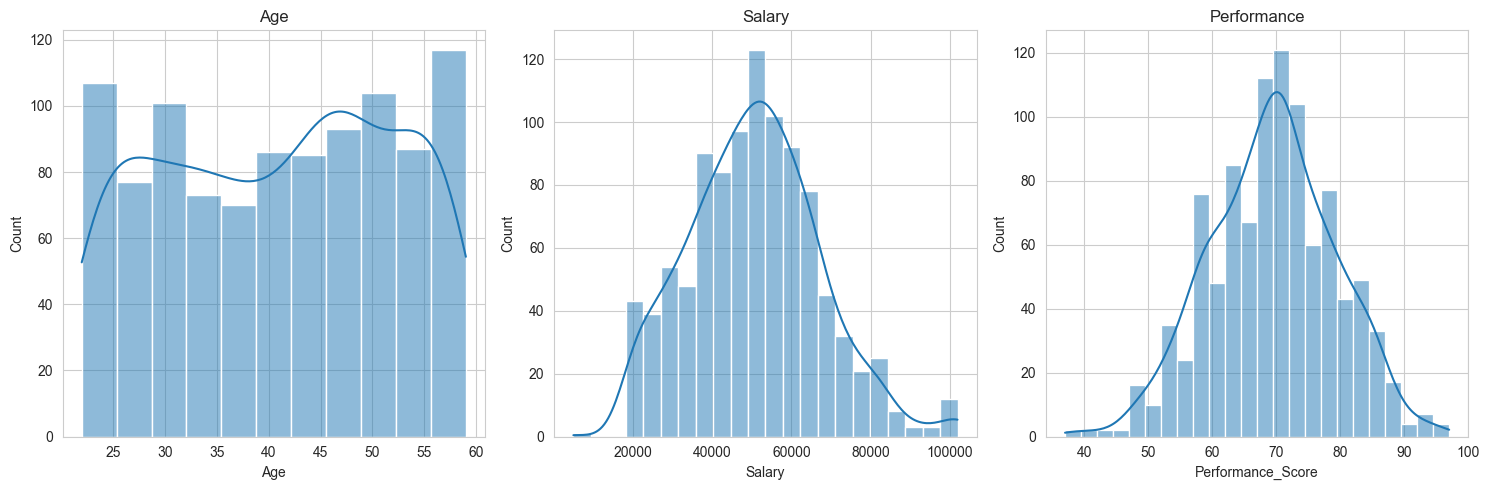

In [78]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(df['Age'], kde=True, ax=axes[0]); axes[0].set_title('Age')
sns.histplot(df['Salary'], kde=True, ax=axes[1]); axes[1].set_title('Salary')
sns.histplot(df['Performance_Score'], kde=True, ax=axes[2]); axes[2].set_title('Performance')
plt.tight_layout(); plt.show()

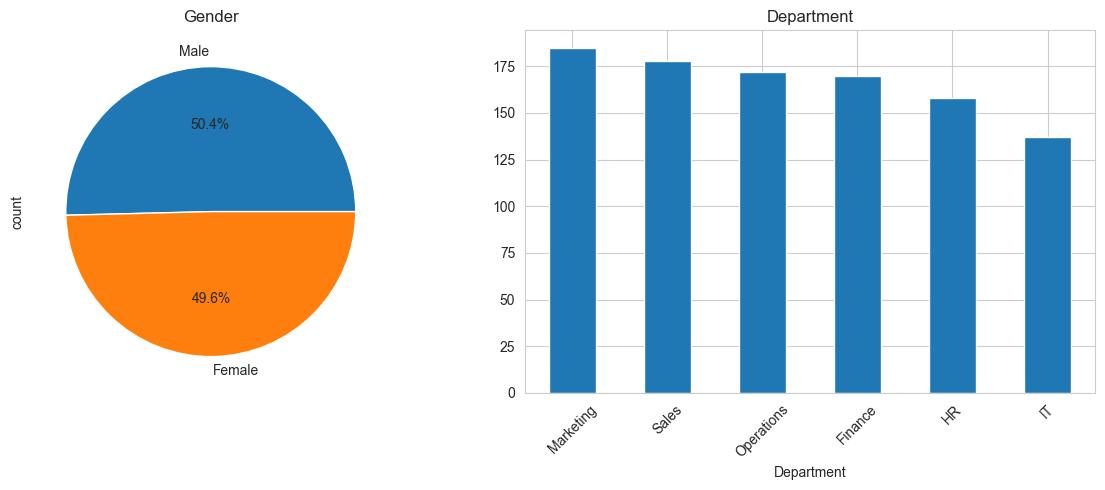

In [79]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
df['Gender'].value_counts().plot.pie(ax=axes[0], autopct='%1.1f%%'); axes[0].set_title('Gender')
df['Department'].value_counts().plot.bar(ax=axes[1]); axes[1].set_title('Department'); plt.xticks(rotation=45)
plt.tight_layout(); plt.show()

# Bivariate

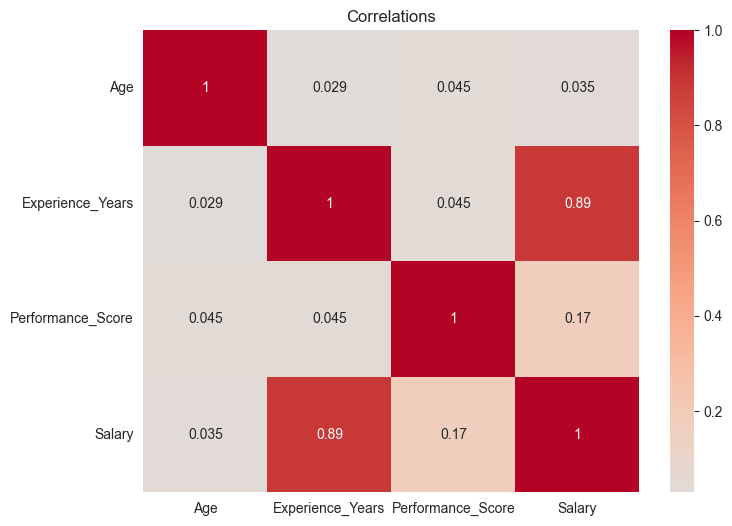

In [80]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlations'); plt.show()

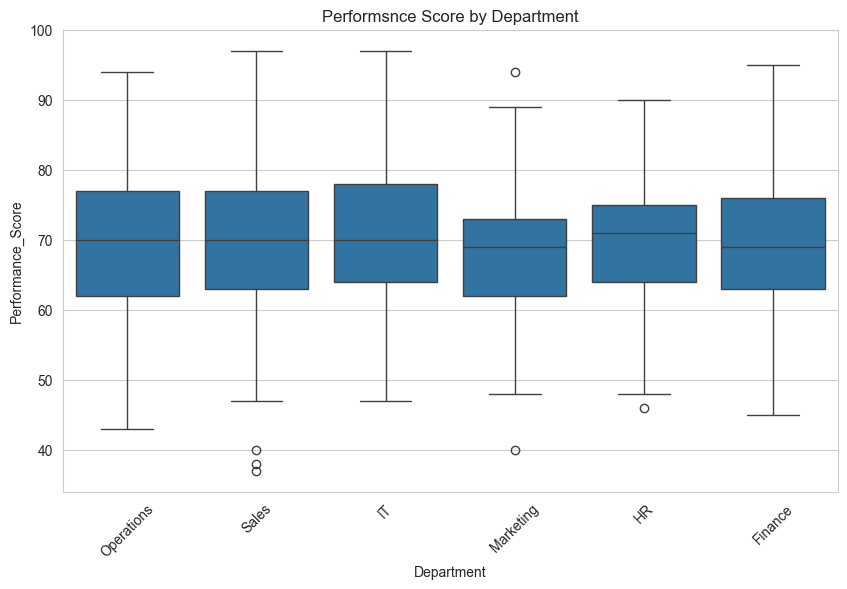

In [83]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Department', y='Performance_Score'); plt.title('Performsnce Score by Department'); plt.xticks(rotation=45); plt.show()

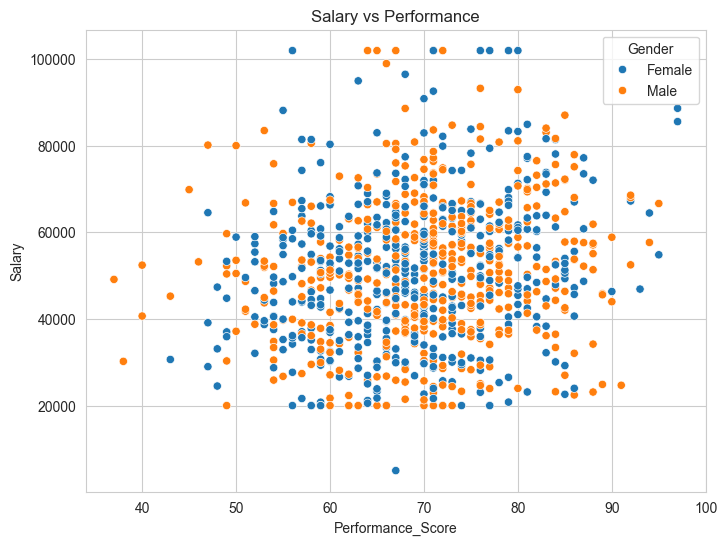

In [84]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Performance_Score', y='Salary', hue='Gender'); plt.title('Salary vs Performance'); plt.show()

# Modelling

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error
import joblib
import json

In [87]:
features = ['Engagement_Index', 'Experience_Years', 'Performance_Category']
X = df[features].copy()
y = df['Salary']

In [88]:
cat_features = ['Performance_Category']
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(drop='first'), cat_features)],
    remainder='passthrough'
)

In [89]:
pipeline = Pipeline([('prep', preprocessor), ('model', LinearRegression())])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [90]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"R²: {r2:.3f}, MAE: ${mae:,.0f}")

R²: 0.841, MAE: $4,450


In [104]:
# predictions and residuals
df['Predicted_Salary'] = pipeline.predict(X)
df['Residuals'] = df['Salary'] - df['Predicted_Salary']

df[['Predicted_Salary', 'Residuals']] = df[['Predicted_Salary', 'Residuals']].round(0).astype(int)

In [105]:
df.head()

,Age,Gender,Department,Experience_Years,Performance_Score,Salary,Engagement_Index,Performance_Category,Predicted_Salary,Residuals
0,49,Female,Operations,5,67,33013,6,Medium,40213,-7200
1,55,Female,Sales,5,70,42640,7,High,44344,-1704
2,29,Female,Sales,10,68,72180,7,Medium,64997,7183
3,30,Female,Operations,9,70,65750,7,High,63575,2175
4,58,Male,Sales,11,72,74830,7,High,73191,1639


In [110]:
# Save data (w/ new cols)
df.to_csv('processed_employee_data.csv', index=False)

# Save model
joblib.dump(pipeline, 'salary_prediction_model.pkl')

# Save summary JSON
summary = {
    'avg_performance': float(df['Performance_Score'].mean()),
    'avg_salary': float(df['Salary'].mean()),
    'high_performers_pct': float(len(df[df['Performance_Category']=='High']) / len(df) * 100),
    'model_r2': float(r2)
}
with open('eda_summary.json', 'w') as f:
    json.dump(summary, f)

print("Artifacts exported!")

Artifacts exported!
